Principal referência: projeto baseado em https://keras.io/examples/generative/vae/

1. Importing Libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

Parameters

In [3]:
num_channels = 1

Create a sampling layer

In [4]:
class Sampling(layers.Layer):
  """Uses (z_mean, z_log_var) to sample z, the vector encoding an image."""

  def call(self, inputs):
    z_mean, z_log_var = inputs
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

## **Encoders**

In [5]:
#ENCODER
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)

conv_shape = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

In [6]:
#ENCODER 2
latent_dim2 = 5

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)

conv_shape2 = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim2, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim2, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder2 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder2")
encoder2.summary()

Model: "encoder2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 14, 14, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d_2[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 3136)         0           ['conv2d_3[0][0]']               
                                                                                           

In [7]:
#ENCODER 3 (just 1 dense layer with 10 neurons)
latent_dim3=5
input_dim=28*28
encoder_inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(10, activation="sigmoid")(encoder_inputs)
z_mean = layers.Dense(latent_dim3, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim3, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder3 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder4")
encoder3.summary()

Model: "encoder4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 10)           7850        ['input_3[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 5)            55          ['dense_2[0][0]']                
                                                                                                  
 z_log_var (Dense)              (None, 5)            55          ['dense_2[0][0]']                
                                                                                           

In [8]:
#ENCODER 4 (two dense layers)
latent_dim4=5
input_dim=28*28
encoder_inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(30, activation="sigmoid")(encoder_inputs)
x = layers.Dense(10, activation="sigmoid")(x)
z_mean = layers.Dense(latent_dim4, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim4, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder4 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder4")
encoder4.summary()

Model: "encoder4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           23550       ['input_4[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 10)           310         ['dense_3[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 5)            55          ['dense_4[0][0]']                
                                                                                           

In [9]:
#ENCODER 5 (three convolutional layers and latent dimension 8)
latent_dim5 = 8

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

conv_shape5 = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim5, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim5, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder5 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder5")
encoder5.summary()

Model: "encoder5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 32)   320         ['input_5[0][0]']                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_4[0][0]']               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 128)  73856       ['conv2d_5[0][0]']               
                                                                                           

In [10]:
#ENCODER 6 (three convolutional layers and latent dimension 12)
latent_dim6 = 8

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

conv_shape6 = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim6, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim6, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder6 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder6")
encoder6.summary()

Model: "encoder6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 28, 28, 32)   320         ['input_6[0][0]']                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_7[0][0]']               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 28, 28, 128)  73856       ['conv2d_8[0][0]']               
                                                                                           

In [11]:
#ENCODER 7 (four convolutional layers and latent dimension 12)
latent_dim7 = 12

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

conv_shape7 = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim7, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim7, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder7 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder7")
encoder7.summary()

Model: "encoder7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 28, 28, 32)   320         ['input_7[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_10[0][0]']              
                                                                                                  
 conv2d_12 (Conv2D)             (None, 28, 28, 64)   36928       ['conv2d_11[0][0]']              
                                                                                           

In [77]:
#ENCODER 8 (four convolutional layers and latent dimension 2)
latent_dim8 = 2

encoder_inputs = keras.Input(shape=(28, 28, num_channels))
x = layers.Conv2D(32, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

conv_shape8 = K.int_shape(x)  #shape of conv to be provided to decoder

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim8, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim8, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder8 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder8")
encoder8.summary()

Model: "encoder8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 28, 28, 32)   320         ['input_19[0][0]']               
                                                                                                  
 conv2d_19 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_18[0][0]']              
                                                                                                  
 conv2d_20 (Conv2D)             (None, 28, 28, 64)   36928       ['conv2d_19[0][0]']              
                                                                                           

In [93]:
#ENCODER 9 (two dense layers)
latent_dim9=2
input_dim=28*28
encoder_inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(30, activation="sigmoid")(encoder_inputs)
x = layers.Dense(10, activation="sigmoid")(x)
z_mean = layers.Dense(latent_dim9, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim9, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder9 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder9")
encoder9.summary()

Model: "encoder9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_58 (Dense)               (None, 30)           23550       ['input_24[0][0]']               
                                                                                                  
 dense_59 (Dense)               (None, 10)           310         ['dense_58[0][0]']               
                                                                                                  
 z_mean (Dense)                 (None, 2)            22          ['dense_59[0][0]']               
                                                                                           

## **DECODERS**

In [12]:
#DECODER
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation="relu")(latent_inputs)
x = layers.Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_12 (Dense)            (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

In [13]:
#DECODER 2

latent_inputs2 = keras.Input(shape=(latent_dim2,))
x = layers.Dense(conv_shape2[1] * conv_shape2[2] * conv_shape2[3], activation="relu")(latent_inputs2)
x = layers.Reshape((conv_shape2[1], conv_shape2[2], conv_shape2[3]))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder2 = keras.Model(latent_inputs2, decoder_outputs, name="decoder2")
decoder2.summary()

Model: "decoder2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_13 (Dense)            (None, 3136)              18816     
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 14, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 28, 28, 1)        289

In [14]:
#DECODER 3
latent_inputs3 = keras.Input(shape=(latent_dim3,))
x = layers.Dense(10, activation="sigmoid")(latent_inputs3)
decoder_outputs = layers.Dense(input_dim,activation = 'sigmoid')(x)
decoder3 = keras.Model(latent_inputs3, decoder_outputs, name="decoder3")
decoder3.summary()

Model: "decoder3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_14 (Dense)            (None, 10)                60        
                                                                 
 dense_15 (Dense)            (None, 784)               8624      
                                                                 
Total params: 8,684
Trainable params: 8,684
Non-trainable params: 0
_________________________________________________________________


In [15]:
#DECODER 4
latent_inputs4 = keras.Input(shape=(latent_dim4,))
x = layers.Dense(10, activation="sigmoid")(latent_inputs4)
x = layers.Dense(30, activation="sigmoid")(x)
decoder_outputs = layers.Dense(input_dim,activation = 'sigmoid')(x)
decoder4 = keras.Model(latent_inputs4, decoder_outputs, name="decoder4")
decoder4.summary()

Model: "decoder4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_16 (Dense)            (None, 10)                60        
                                                                 
 dense_17 (Dense)            (None, 30)                330       
                                                                 
 dense_18 (Dense)            (None, 784)               24304     
                                                                 
Total params: 24,694
Trainable params: 24,694
Non-trainable params: 0
_________________________________________________________________


In [16]:
#DECODER 5

latent_inputs5 = keras.Input(shape=(latent_dim5,))
x = layers.Dense(conv_shape5[1] * conv_shape5[2] * conv_shape5[3], activation="relu")(latent_inputs5)
x = layers.Reshape((conv_shape5[1], conv_shape5[2], conv_shape5[3]))(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder5 = keras.Model(latent_inputs5, decoder_outputs, name="decoder5")
decoder5.summary()

Model: "decoder5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_19 (Dense)            (None, 100352)            903168    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 128)       0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 28, 28, 128)      147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 28, 28, 64)       73792     
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 28, 28, 32)       184

In [20]:
#DECODER 6
latent_inputs6 = keras.Input(shape=(latent_dim6,))
x = layers.Dense(16, activation="relu")(latent_inputs6)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(conv_shape6[1] * conv_shape6[2] * conv_shape6[3], activation="relu")(x)
x = layers.Reshape((conv_shape6[1], conv_shape6[2], conv_shape6[3]))(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder6 = keras.Model(latent_inputs6, decoder_outputs, name="decoder6")
decoder6.summary()

Model: "decoder6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_32 (Dense)            (None, 16)                144       
                                                                 
 dense_33 (Dense)            (None, 32)                544       
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dense_35 (Dense)            (None, 100352)            6522880   
                                                                 
 reshape_6 (Reshape)         (None, 28, 28, 128)       0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 28, 28, 128)      147

In [21]:
#DECODER 7
latent_inputs7 = keras.Input(shape=(latent_dim7,))
x = layers.Dense(16, activation="relu")(latent_inputs7)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(conv_shape7[1] * conv_shape7[2] * conv_shape7[3], activation="relu")(x)
x = layers.Reshape((conv_shape7[1], conv_shape7[2], conv_shape7[3]))(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder7 = keras.Model(latent_inputs7, decoder_outputs, name="decoder7")
decoder7.summary()

Model: "decoder7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 12)]              0         
                                                                 
 dense_36 (Dense)            (None, 16)                208       
                                                                 
 dense_37 (Dense)            (None, 32)                544       
                                                                 
 dense_38 (Dense)            (None, 64)                2112      
                                                                 
 dense_39 (Dense)            (None, 100352)            6522880   
                                                                 
 reshape_7 (Reshape)         (None, 28, 28, 128)       0         
                                                                 
 conv2d_transpose_22 (Conv2D  (None, 28, 28, 128)      147

In [78]:
#DECODER 8
latent_inputs8 = keras.Input(shape=(latent_dim8,))
x = layers.Dense(16, activation="relu")(latent_inputs8)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(conv_shape8[1] * conv_shape8[2] * conv_shape8[3], activation="relu")(x)
x = layers.Reshape((conv_shape8[1], conv_shape8[2], conv_shape8[3]))(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(num_channels, 3, activation="sigmoid", padding="same")(x)
decoder8 = keras.Model(latent_inputs8, decoder_outputs, name="decoder7")
decoder8.summary()

Model: "decoder7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_46 (Dense)            (None, 16)                48        
                                                                 
 dense_47 (Dense)            (None, 32)                544       
                                                                 
 dense_48 (Dense)            (None, 64)                2112      
                                                                 
 dense_49 (Dense)            (None, 100352)            6522880   
                                                                 
 reshape_8 (Reshape)         (None, 28, 28, 128)       0         
                                                                 
 conv2d_transpose_26 (Conv2D  (None, 28, 28, 128)      147

In [92]:
#DECODER 9
latent_inputs9 = keras.Input(shape=(latent_dim9,))
x = layers.Dense(10, activation="sigmoid")(latent_inputs9)
x = layers.Dense(30, activation="sigmoid")(x)
decoder_outputs = layers.Dense(input_dim,activation = 'sigmoid')(x)
decoder9 = keras.Model(latent_inputs9, decoder_outputs, name="decoder9")
decoder9.summary()

Model: "decoder9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_55 (Dense)            (None, 10)                30        
                                                                 
 dense_56 (Dense)            (None, 30)                330       
                                                                 
 dense_57 (Dense)            (None, 784)               24304     
                                                                 
Total params: 24,664
Trainable params: 24,664
Non-trainable params: 0
_________________________________________________________________


## **Define the VAE as a Model with a custom train_step**

adaptado de https://keras.io/examples/generative/vae/

In [22]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        x,y = data
        #Use gradientTape to record everything we need to compute the gradient
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x)
            reconstruction = self.decoder(z)
            #Se a entrada for (,28,28,1)
            if(x.shape[1]==28):
              reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=(1, 2)
                )
            )
            #Se a entrada for (,784)
            if(x.shape[1]==784):
              reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=None
                )
            )  
            #reconstruction_loss = input_dim*keras.losses.binary_crossentropy(x, reconstruction)    #input_dim=784
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        
        #Compute gradients
        grads = tape.gradient(total_loss, self.trainable_weights)
        #Apply gradients using the optimizer
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        #Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
    def test_step(self,data):
      x,y=data
      #Get the data
      z_mean, z_log_var, z = self.encoder(x,training=False)
      #Prediction
      reconstruction = self.decoder(z,training=False)
      #Loss
      #Se a entrada for (,28,28,1)
      if(x.shape[1]==28):
        reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=(1, 2)
                )
            )
      #Se a entrada for (,784)
      if(x.shape[1]==784):
        reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(x, reconstruction), axis=None
                )
            )
      #reconstruction_loss = input_dim*keras.losses.binary_crossentropy(x, reconstruction)    #input_dim=784
      kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
      kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
      total_loss = reconstruction_loss + kl_loss

      #Update metrics
      self.total_loss_tracker.update_state(total_loss)
      self.reconstruction_loss_tracker.update_state(reconstruction_loss)
      self.kl_loss_tracker.update_state(kl_loss)
      return {
          "loss": self.total_loss_tracker.result(),
          "reconstruction_loss": self.reconstruction_loss_tracker.result(),
          "kl_loss": self.kl_loss_tracker.result(),
      }

## **Train the VAE**

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
fashion_mnist_digits = np.concatenate([x_train, x_test], axis=0)
#Podemos usar todas as entradas para treinamento pois esse é um treinamento autosupervisionado

4422102/4422102 [==============================] - 0s 0us/step


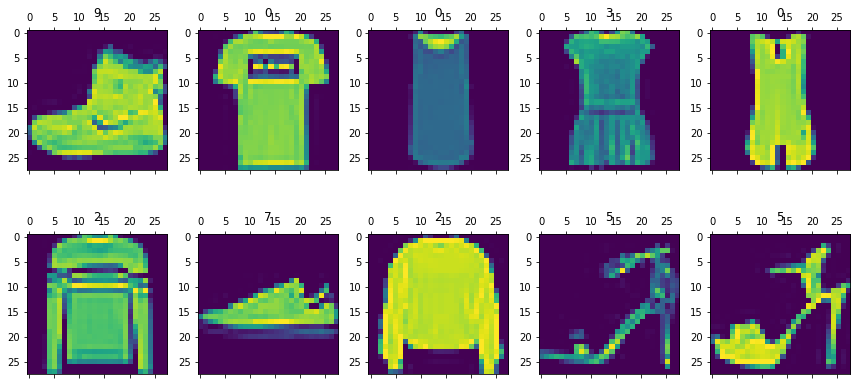

In [24]:
# Display images of the first 10 images in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(x_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

In [25]:
fashion_mnist_digits = np.expand_dims(fashion_mnist_digits, -1).astype("float32") / 255
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_val = np.expand_dims(x_test, -1).astype("float32") / 255

In [26]:
#VAE 1
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
#history = vae.fit(mnist_digits, validation_split=0.3, epochs=20, batch_size=128)
history = vae.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 13s 71ms/step - loss: 504.5330 - reconstruction_loss: 456.2653 - kl_loss: 2.5929 - val_loss: 391.7110 - val_reconstruction_loss: 386.5158 - val_kl_loss: 5.1951
Epoch 2/30
59/59 [==============================] - 3s 49ms/step - loss: 383.6120 - reconstruction_loss: 373.3888 - kl_loss: 4.8522 - val_loss: 370.8468 - val_reconstruction_loss: 366.4107 - val_kl_loss: 4.4361
Epoch 3/30
59/59 [==============================] - 3s 51ms/step - loss: 365.0895 - reconstruction_loss: 353.3790 - kl_loss: 6.6029 - val_loss: 345.7897 - val_reconstruction_loss: 336.6415 - val_kl_loss: 9.1482
Epoch 4/30
59/59 [==============================] - 3s 52ms/step - loss: 336.5229 - reconstruction_loss: 318.7628 - kl_loss: 10.6914 - val_loss: 317.2192 - val_reconstruction_loss: 305.9542 - val_kl_loss: 11.2650
Epoch 5/30
59/59 [==============================] - 3s 52ms/step - loss: 310.3577 - reconstruction_loss: 295.1742 - kl_loss: 11.6629 - val_loss: 301.9947

In [27]:
#VAE 2
vae2 = VAE(encoder2, decoder2)
vae2.compile(optimizer=keras.optimizers.Adam())
history2 = vae2.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 4s 58ms/step - loss: 485.3855 - reconstruction_loss: 433.0938 - kl_loss: 3.8637 - val_loss: 369.1952 - val_reconstruction_loss: 361.6534 - val_kl_loss: 7.5418
Epoch 2/30
59/59 [==============================] - 3s 51ms/step - loss: 352.8036 - reconstruction_loss: 334.7116 - kl_loss: 9.3665 - val_loss: 332.6240 - val_reconstruction_loss: 323.3987 - val_kl_loss: 9.2253
Epoch 3/30
59/59 [==============================] - 3s 53ms/step - loss: 327.7990 - reconstruction_loss: 314.9362 - kl_loss: 9.5490 - val_loss: 318.8572 - val_reconstruction_loss: 309.4927 - val_kl_loss: 9.3645
Epoch 4/30
59/59 [==============================] - 3s 53ms/step - loss: 311.9617 - reconstruction_loss: 294.4855 - kl_loss: 10.9054 - val_loss: 293.7831 - val_reconstruction_loss: 282.4403 - val_kl_loss: 11.3427
Epoch 5/30
59/59 [==============================] - 3s 53ms/step - loss: 288.6573 - reconstruction_loss: 274.2936 - kl_loss: 11.8876 - val_loss: 282.9516 

# Para testar os próximos modelos 2, temos que fazer um reshape pois eles não são convolucionais

In [30]:
# Reshape input data
x_train_reshaped = x_train.reshape(60000, 784)
x_val_reshaped = x_val.reshape(10000, 784)

# Print shapes
print("New shape of X_train: ",x_train_reshaped.shape)
print("New shape of X_test: ", x_val_reshaped.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


In [31]:
#VAE 3
vae3 = VAE(encoder3, decoder3)
vae3.compile(optimizer=keras.optimizers.Adam())
history3 = vae3.fit(x = x_train_reshaped, y = x_train_reshaped, validation_data=(x_val_reshaped,x_val_reshaped), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 1s 10ms/step - loss: 689.8126 - reconstruction_loss: 664.2866 - kl_loss: 0.9317 - val_loss: 613.5454 - val_reconstruction_loss: 611.2314 - val_kl_loss: 2.3140
Epoch 2/30
59/59 [==============================] - 0s 7ms/step - loss: 610.0551 - reconstruction_loss: 587.2955 - kl_loss: 3.8921 - val_loss: 554.2397 - val_reconstruction_loss: 549.1081 - val_kl_loss: 5.1316
Epoch 3/30
59/59 [==============================] - 0s 7ms/step - loss: 557.7979 - reconstruction_loss: 541.1660 - kl_loss: 5.7475 - val_loss: 526.3500 - val_reconstruction_loss: 520.3920 - val_kl_loss: 5.9581
Epoch 4/30
59/59 [==============================] - 0s 7ms/step - loss: 533.5383 - reconstruction_loss: 521.4694 - kl_loss: 5.8223 - val_loss: 513.5987 - val_reconstruction_loss: 508.1024 - val_kl_loss: 5.4964
Epoch 5/30
59/59 [==============================] - 0s 7ms/step - loss: 522.4272 - reconstruction_loss: 512.3005 - kl_loss: 5.1814 - val_loss: 506.4150 - val_r

In [32]:
#VAE 4
vae4 = VAE(encoder4, decoder4)
vae4.compile(optimizer=keras.optimizers.Adam())
history4 = vae4.fit(x = x_train_reshaped, y = x_train_reshaped, validation_data=(x_val_reshaped,x_val_reshaped), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 1s 10ms/step - loss: 662.7947 - reconstruction_loss: 620.1470 - kl_loss: 0.2703 - val_loss: 547.9982 - val_reconstruction_loss: 547.5035 - val_kl_loss: 0.4946
Epoch 2/30
59/59 [==============================] - 0s 7ms/step - loss: 545.2386 - reconstruction_loss: 530.2563 - kl_loss: 0.7348 - val_loss: 506.8775 - val_reconstruction_loss: 506.0457 - val_kl_loss: 0.8318
Epoch 3/30
59/59 [==============================] - 0s 7ms/step - loss: 514.6467 - reconstruction_loss: 508.0627 - kl_loss: 0.6734 - val_loss: 496.9565 - val_reconstruction_loss: 496.4628 - val_kl_loss: 0.4936
Epoch 4/30
59/59 [==============================] - 0s 7ms/step - loss: 506.5524 - reconstruction_loss: 501.6926 - kl_loss: 0.4670 - val_loss: 492.5416 - val_reconstruction_loss: 491.9692 - val_kl_loss: 0.5724
Epoch 5/30
59/59 [==============================] - 0s 7ms/step - loss: 502.5335 - reconstruction_loss: 497.1319 - kl_loss: 0.9299 - val_loss: 488.7908 - val_r

In [33]:
#VAE 5
vae5 = VAE(encoder5, decoder5)
vae5.compile(optimizer=keras.optimizers.Adam())
history5 = vae5.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 30s 428ms/step - loss: 447.0396 - reconstruction_loss: 413.6165 - kl_loss: 0.0015 - val_loss: 389.7183 - val_reconstruction_loss: 389.7179 - val_kl_loss: 3.1173e-04
Epoch 2/30
59/59 [==============================] - 22s 369ms/step - loss: 387.7232 - reconstruction_loss: 387.2410 - kl_loss: 4.2247e-04 - val_loss: 387.1573 - val_reconstruction_loss: 387.1568 - val_kl_loss: 5.3146e-04
Epoch 3/30
59/59 [==============================] - 22s 372ms/step - loss: 386.5323 - reconstruction_loss: 385.9044 - kl_loss: 5.5153e-04 - val_loss: 385.8261 - val_reconstruction_loss: 385.8256 - val_kl_loss: 5.9053e-04
Epoch 4/30
59/59 [==============================] - 22s 374ms/step - loss: 385.1143 - reconstruction_loss: 384.9289 - kl_loss: 6.7485e-04 - val_loss: 385.6592 - val_reconstruction_loss: 385.6584 - val_kl_loss: 7.7742e-04
Epoch 5/30
59/59 [==============================] - 22s 376ms/step - loss: 385.2373 - reconstruction_loss: 384.9648 - kl

In [34]:
#VAE 6
vae6 = VAE(encoder6, decoder6)
vae6.compile(optimizer=keras.optimizers.Adam())
history6 = vae6.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 25s 413ms/step - loss: 434.0746 - reconstruction_loss: 394.8145 - kl_loss: 2.4141 - val_loss: 353.4553 - val_reconstruction_loss: 347.2204 - val_kl_loss: 6.2348
Epoch 2/30
59/59 [==============================] - 24s 413ms/step - loss: 328.7745 - reconstruction_loss: 305.7890 - kl_loss: 10.1364 - val_loss: 298.9170 - val_reconstruction_loss: 287.3724 - val_kl_loss: 11.5447
Epoch 3/30
59/59 [==============================] - 23s 396ms/step - loss: 293.5082 - reconstruction_loss: 277.3362 - kl_loss: 11.7703 - val_loss: 281.5426 - val_reconstruction_loss: 269.3109 - val_kl_loss: 12.2317
Epoch 4/30
59/59 [==============================] - 23s 399ms/step - loss: 278.3812 - reconstruction_loss: 264.1251 - kl_loss: 12.4124 - val_loss: 273.3192 - val_reconstruction_loss: 260.8192 - val_kl_loss: 12.5000
Epoch 5/30
59/59 [==============================] - 24s 401ms/step - loss: 270.2206 - reconstruction_loss: 255.6959 - kl_loss: 12.9892 - val_l

In [35]:
#VAE 7
vae7 = VAE(encoder7, decoder7)
vae7.compile(optimizer=keras.optimizers.Adam())
history7 = vae7.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 30s 480ms/step - loss: 423.0242 - reconstruction_loss: 372.1101 - kl_loss: 5.8625 - val_loss: 325.5523 - val_reconstruction_loss: 315.4775 - val_kl_loss: 10.0748
Epoch 2/30
59/59 [==============================] - 26s 448ms/step - loss: 315.4038 - reconstruction_loss: 299.0990 - kl_loss: 10.8187 - val_loss: 301.2046 - val_reconstruction_loss: 288.6783 - val_kl_loss: 12.5263
Epoch 3/30
59/59 [==============================] - 28s 469ms/step - loss: 296.1642 - reconstruction_loss: 281.2445 - kl_loss: 12.0188 - val_loss: 287.9646 - val_reconstruction_loss: 275.1596 - val_kl_loss: 12.8050
Epoch 4/30
59/59 [==============================] - 28s 469ms/step - loss: 286.1895 - reconstruction_loss: 268.4095 - kl_loss: 13.1956 - val_loss: 277.1812 - val_reconstruction_loss: 264.3720 - val_kl_loss: 12.8093
Epoch 5/30
59/59 [==============================] - 27s 450ms/step - loss: 272.1454 - reconstruction_loss: 257.0948 - kl_loss: 13.7230 - val_

In [79]:
#VAE 8
vae8 = VAE(encoder8, decoder8)
vae8.compile(optimizer=keras.optimizers.Adam())
history8 = vae8.fit(x = x_train, y = x_train, validation_data=(x_val,x_val), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 27s 445ms/step - loss: 321.1937 - reconstruction_loss: 243.0409 - kl_loss: 3.3866 - val_loss: 604.5841 - val_reconstruction_loss: 604.1385 - val_kl_loss: 0.4456
Epoch 2/30
59/59 [==============================] - 25s 426ms/step - loss: 196.2307 - reconstruction_loss: 190.4001 - kl_loss: 2.7995 - val_loss: 653.6886 - val_reconstruction_loss: 651.7067 - val_kl_loss: 1.9819
Epoch 3/30
59/59 [==============================] - 25s 430ms/step - loss: 184.6160 - reconstruction_loss: 176.0400 - kl_loss: 3.8378 - val_loss: 674.2676 - val_reconstruction_loss: 669.0059 - val_kl_loss: 5.2618
Epoch 4/30
59/59 [==============================] - 27s 455ms/step - loss: 167.9862 - reconstruction_loss: 161.4187 - kl_loss: 4.9388 - val_loss: 716.4797 - val_reconstruction_loss: 711.9229 - val_kl_loss: 4.5569
Epoch 5/30
59/59 [==============================] - 27s 458ms/step - loss: 162.5767 - reconstruction_loss: 156.4267 - kl_loss: 5.2029 - val_loss: 78

In [94]:
#VAE 9
vae9 = VAE(encoder9, decoder9)
vae9.compile(optimizer=keras.optimizers.Adam())
history9 = vae9.fit(x = x_train_reshaped, y = x_train_reshaped, validation_data=(x_val_reshaped,x_val_reshaped), epochs=30, batch_size=1024)

Epoch 1/30
59/59 [==============================] - 2s 19ms/step - loss: 665.3211 - reconstruction_loss: 623.5839 - kl_loss: 0.3582 - val_loss: 552.2135 - val_reconstruction_loss: 552.0999 - val_kl_loss: 0.1136
Epoch 2/30
59/59 [==============================] - 1s 10ms/step - loss: 548.7712 - reconstruction_loss: 533.8109 - kl_loss: 0.1917 - val_loss: 508.3999 - val_reconstruction_loss: 508.0997 - val_kl_loss: 0.3002
Epoch 3/30
59/59 [==============================] - 1s 9ms/step - loss: 515.9393 - reconstruction_loss: 509.0954 - kl_loss: 0.3659 - val_loss: 497.1772 - val_reconstruction_loss: 496.7577 - val_kl_loss: 0.4196
Epoch 4/30
59/59 [==============================] - 0s 7ms/step - loss: 506.6476 - reconstruction_loss: 501.8163 - kl_loss: 0.5138 - val_loss: 492.8766 - val_reconstruction_loss: 492.2696 - val_kl_loss: 0.6070
Epoch 5/30
59/59 [==============================] - 0s 8ms/step - loss: 503.1246 - reconstruction_loss: 497.9893 - kl_loss: 0.7687 - val_loss: 489.9553 - val_

## **Plot the Loss Function**

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


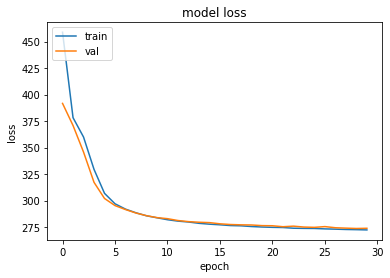

In [36]:
#VAE 1
# list all data in history
print(history.history.keys()) 
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


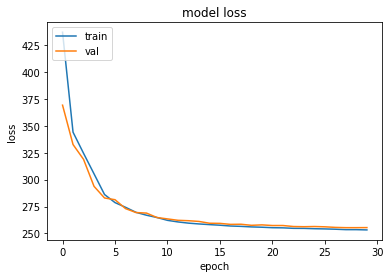

In [37]:
#VAE2
# list all data in history
print(history2.history.keys()) 
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


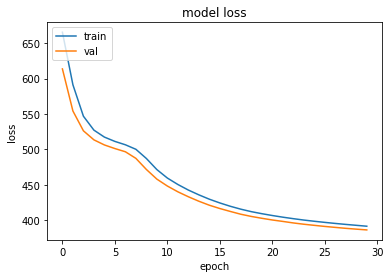

In [38]:
#VAE3
# list all data in history
print(history3.history.keys()) 
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


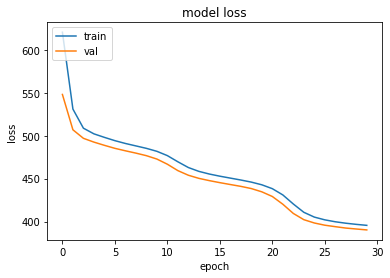

In [39]:
#VAE4
# list all data in history
print(history4.history.keys()) 
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


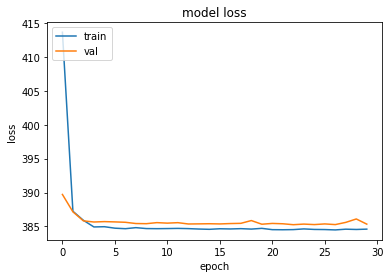

In [40]:
#VAE5
# list all data in history
print(history5.history.keys()) 
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


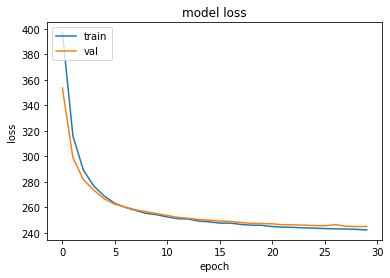

In [41]:
#VAE6
# list all data in history
print(history6.history.keys()) 
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


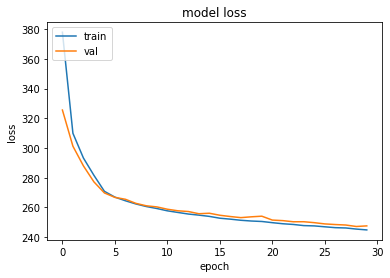

In [42]:
#VAE7
# list all data in history
print(history7.history.keys()) 
# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


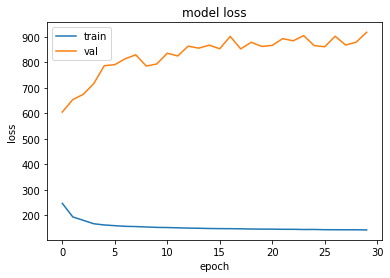

In [85]:
#VAE8
# list all data in history
print(history8.history.keys()) 
# summarize history for loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss', 'val_loss', 'val_reconstruction_loss', 'val_kl_loss'])


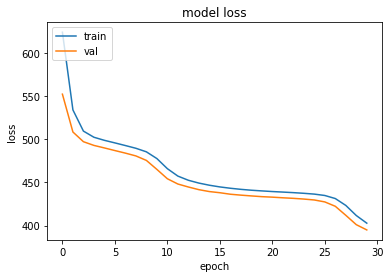

In [96]:
#VAE9
# list all data in history
print(history9.history.keys()) 
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Gerar gráficos com a projeção do espaço latente em 2D (PCA)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Projeção do Espaço Latente para Modelo 1

1875/1875 [==============================] - 3s 2ms/step


Text(0, 0.5, 'Second Principal Component')

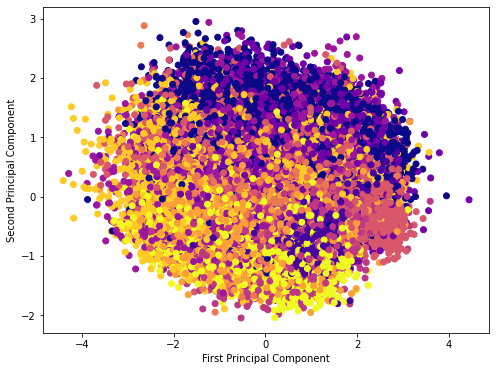

In [46]:
z_mean, _, _ = vae.encoder.predict(x_train)

scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [47]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 100.0%


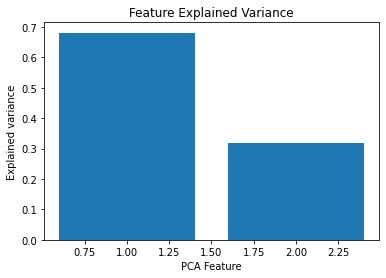

In [48]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 2

1875/1875 [==============================] - 3s 1ms/step


Text(0, 0.5, 'Second Principal Component')

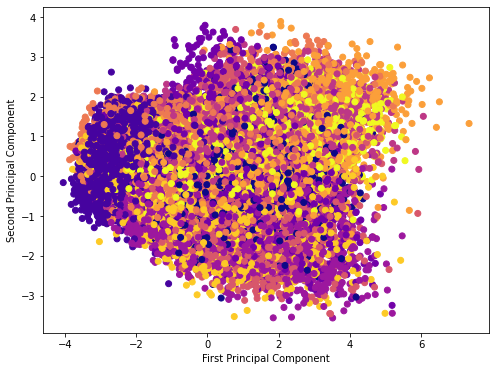

In [49]:
z_mean, _, _ = vae2.encoder.predict(x_train)

scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [50]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 68.5247540473938%


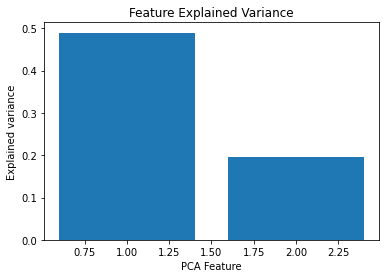

In [51]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 3

In [52]:
z_mean, _, _ = vae3.encoder.predict(x_train_reshaped)

1875/1875 [==============================] - 3s 1ms/step


Text(0, 0.5, 'Second Principal Component')

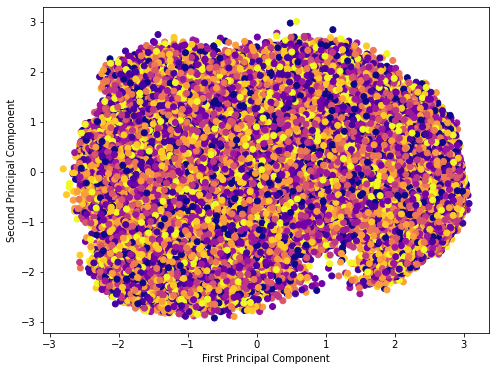

In [53]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [54]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 78.7269115447998%


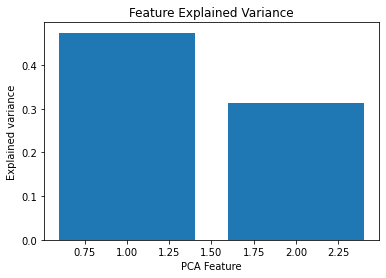

In [55]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 4

In [56]:
z_mean, _, _ = vae4.encoder.predict(x_train_reshaped)

1875/1875 [==============================] - 3s 1ms/step


Text(0, 0.5, 'Second Principal Component')

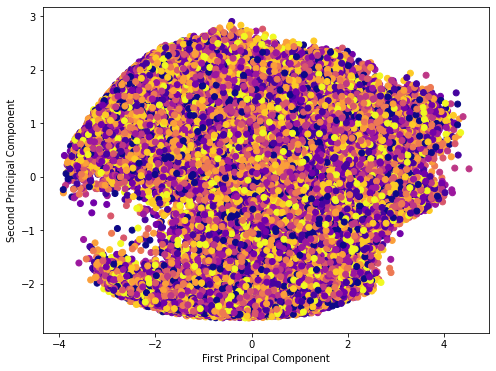

In [57]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [58]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 99.54761266708374%


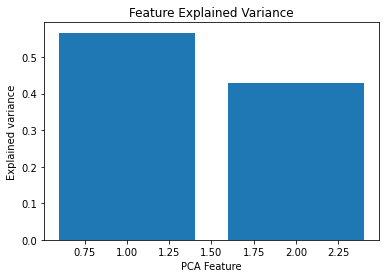

In [59]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 5

In [60]:
z_mean, _, _ = vae5.encoder.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


Text(0, 0.5, 'Second Principal Component')

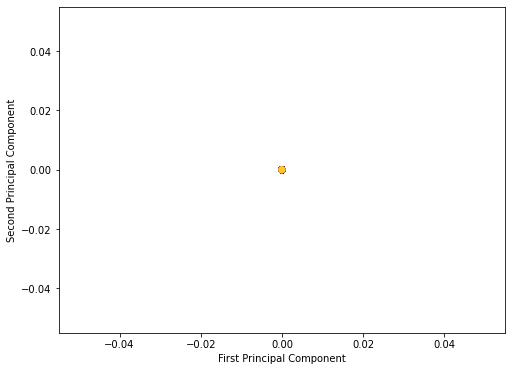

In [61]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [62]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: nan%


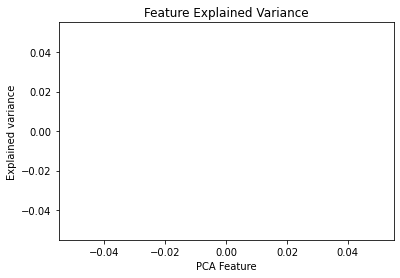

In [63]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 6

In [64]:
z_mean, _, _ = vae6.encoder.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


Text(0, 0.5, 'Second Principal Component')

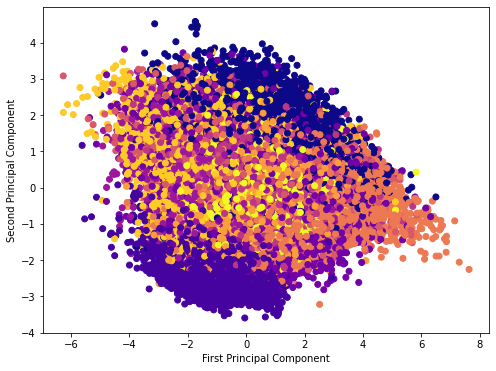

In [65]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [66]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 51.63087248802185%


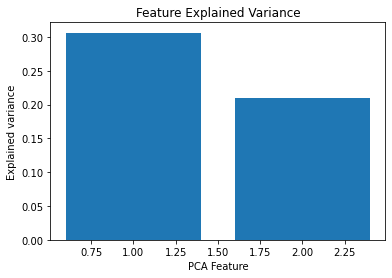

In [67]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 7

In [68]:
z_mean, _, _ = vae7.encoder.predict(x_train)

1875/1875 [==============================] - 5s 3ms/step


Text(0, 0.5, 'Second Principal Component')

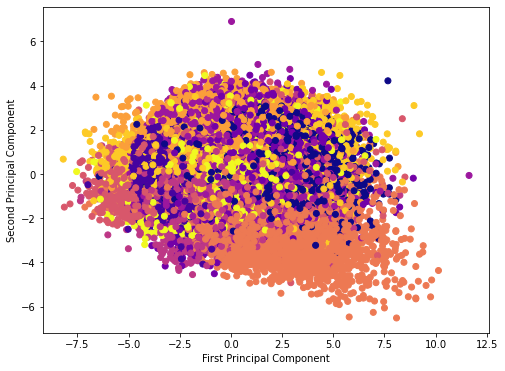

In [69]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [70]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 68.33505630493164%


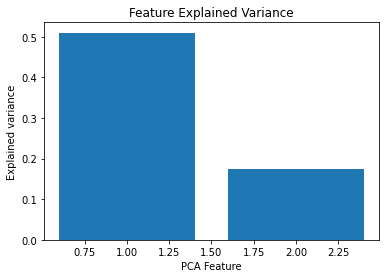

In [71]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 8

In [81]:
z_mean, _, _ = vae8.encoder.predict(x_train)

1875/1875 [==============================] - 5s 3ms/step


Text(0, 0.5, 'Second Principal Component')

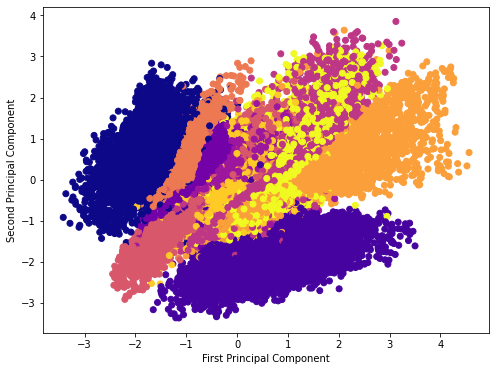

In [82]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [83]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 100.0%


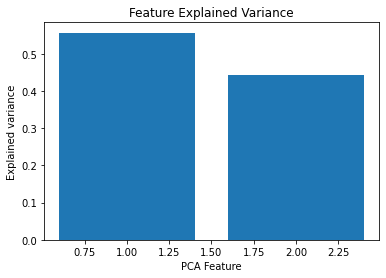

In [84]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## Projeção do Espaço Latente para Modelo 9

In [98]:
z_mean, _, _ = vae9.encoder.predict(x_train_reshaped)

1875/1875 [==============================] - 3s 1ms/step


Text(0, 0.5, 'Second Principal Component')

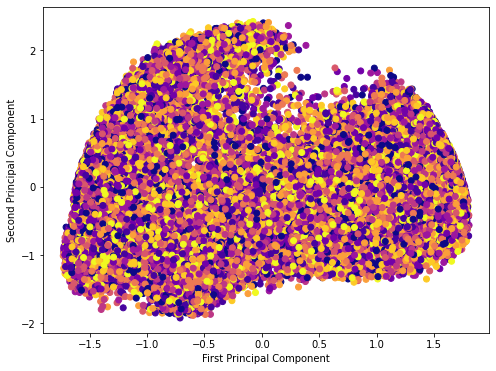

In [99]:
scaler = StandardScaler()
scaler.fit(z_mean)
scaled_data = scaler.transform(z_mean)

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [100]:
#Variância explicada
total = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Percentual da variância total explicada pelas duas componentes principais: {}%".format(total*100))

Percentual da variância total explicada pelas duas componentes principais: 100.0%


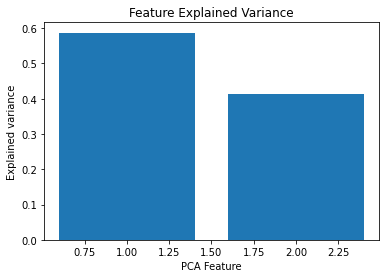

In [101]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

# **Considerações**

Os modelos 3 e 4 foram os únicos nos quais não foram usadas camadas convolucionais. A projeção do espaço latente em 2D usando PCA para esses dois modelos visualmente está bastante misturada e não aparenta ter nenhuma separação de rótulos. Além disso, observando o histórico de perda para esses dois modelos, eles apresentaram perda de validação bem maior que os demais modelos (em torno de 400).

Nas projeções dos modelos 6 e 7, é nítida a concentração de pontos de determinados tipos de cores, o que indica alguma separação entre rótulos, embora não esteja tão clara e bem dividida quanto no caso da MNIST, que é uma dataset mais simples do que o Fashion MNIST.

Dentre os modelos com camadas convolucionais, aqueles que apresentaram menor perda de validação foram os modelos 6, 7. De fato, visualmente esses modelos apresentaram uma separação de rótulos mais sólida do que os modelos 1 e 2.

Um fato extremamente interessante é a situação do modelo 8. O modelo 8 é igual ao modelo 7, com a única diferença de que seu espaço latente tem 2 dimensões, em vez de 12, como no modelo 7.

Ao observar o histórico de perda, vemos que a perda de validação do modelo 8 é bem maior do que a do modelo 7. Entretanto, ao observar a projeção desses modelos em 2 dimensões usando PCA, vemos que a projeção do modelo 8 tem uma separação de rótulos bem melhor que a do modelo 7. A conclusão a que chegamos é que o modelo 7 tem de fato uma separação boa de rótulos, mas ela não foi expressa porque suas 12 dimensões foram reduzidas apenas a 2 utilizando PCA, e essas 2 dimensões tem uma variância total explicada de apenas 68%, o que impede a boa visualização da separação de rótulos que de fato existe no espaço latente. Já no modelo 8, a variância total explicada é exatamente 100%, porque originalmente só havia 2 dimensões no espaço latente.

Tentamos repetir o mesmo experimento, criando um modelo 9 igual ao modelo 4, mas tendo apenas 2 dimensões no espaço latente. Entretanto, dessa vez, mesmo tendo um espaço latente com apenas 2 dimensões, a projeção em 2 dimensões com PCA não apresentou separação entre os rótulos, revelando que o modelo realmente não foi capaz de fazer a separação.

Observação: na projeção do espaço latente do modelo 5 ocorreu algum problema o qual nós não conseguimos identificar.

# **References:**

Leitura bastante esclarecedora: https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73

* https://meritocracy.is/blog/2020/06/24/object-classification-in-tensorflow/
* https://www.assemblyai.com/blog/introduction-to-variational-autoencoders-using-keras/
* https://towardsdatascience.com/distributed-learning-on-image-classification-of-beans-in-tensorflow-5a85e6c3eb71
* https://www.deeplearningbook.com.br/variational-autoencoders-vaes-definicao-reducao-de-dimensionalidade-espaco-latente-e-regularizacao/
* https://github.com/AI-Lab-Makerere/ibean/
* https://www.youtube.com/watch?v=fcvYpzHmhvA (Ótimo video)
* https://www.youtube.com/watch?v=9zKuYvjFFS8

All the first part of this project is based on:
* https://keras.io/examples/generative/vae/
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://julien-vitay.net/lecturenotes-neurocomputing/5-exercises/12-VAE.html (very important to plot validation loss)
* https://github.com/bnsreenu/python_for_microscopists/blob/master/178_179_variational_autoencoders_mnist.py
* https://www.youtube.com/watch?v=8wrLjnQ7EWQ (important to get conv_shape)
* https://towardsdatascience.com/vae-variational-autoencoders-how-to-employ-neural-networks-to-generate-new-images-bdeb216ed2c0 (to show the images and also a very good tutorial in general - I could follow this tutorial WITH DENSE LAYERS)
* https://towardsdatascience.com/how-number-of-hidden-layers-affects-the-quality-of-autoencoder-latent-representation-181215c8e7d1 (SIMPLEST POSSIBLE TUTORIAL WITH DENSE LAYERS)

PCA:
* https://leandrocruvinel.medium.com/pca-na-m%C3%A3o-e-no-python-d559e9c8f053
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://www.jcchouinard.com/pca-with-python/#Plot_the_explained_variance


FIX BUGS:
* https://julien-vitay.net/lecturenotes-neurocomputing/5-exercises/12-VAE.html
* https://fixexception.com/tensorflow/when-subclassing-the-model-class-you-should-implement-a-call-method/
* https://github.com/bnsreenu/python_for_microscopists/blob/master/178_179_variational_autoencoders_mnist.py
* #https://stackoverflow.com/questions/50063613/what-is-the-purpose-of-the-add-loss-function-in-keras
* https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit
* https://stackoverflow.com/questions/71164291/how-to-implement-validation-loss-in-custom-training-loop